In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
logs = pd.read_csv('takehome_user_engagement.csv')
logs

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [5]:
#I'm cutting the time off so that I can group according to user id while retaining distinct dates
logs['time_stamp'] = [pd.to_datetime(time) for time in logs['time_stamp']]
logs['day_stamp'] = [pd.to_datetime(time.strftime('%Y-%m-%d')) for time in logs['time_stamp']]
day_logs = logs[['user_id', 'day_stamp']]
day_logs

,user_id,day_stamp
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25
...,...,...
207912,11996,2013-09-06
207913,11997,2013-01-15
207914,11998,2014-04-27
207915,11999,2012-06-02


In [6]:
day_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    207917 non-null  int64         
 1   day_stamp  207917 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


In [7]:
logs['visited'].unique() #So, it looks like I won't lose anything if I group according to user_id now, given
#'visited' is always true

array([1])

In [8]:
day_logs.groupby(by='user_id')
day_logs
#I do not understand how a person could only log in once a day but that seems like it's already how the dataset is
#structured since this doesn't remove any columns.

,user_id,day_stamp
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25
...,...,...
207912,11996,2013-09-06
207913,11997,2013-01-15
207914,11998,2014-04-27
207915,11999,2012-06-02


In [9]:
#In figuring out whether a user is active, it's worth considering that any user that has never logged in 3 times
#is certainly inactive. #Note - this didn't end up being useful because I found a good way to perform the operation
#using 'diff'
three_logins = day_logs['user_id'].value_counts() >= 3
three_logins.describe()
#This tells me most users cannot be grouped as active because they haven't logged in on three separate days
#This should make it easier to compute the deltas I need.

count      8823
unique        2
top       False
freq       6575
Name: user_id, dtype: object

In [10]:
pos_active = pd.DataFrame(three_logins)
pos_active['pos_active'] = pos_active['user_id']
pos_active

,user_id,pos_active
3623,True,True
906,True,True
1811,True,True
7590,True,True
8068,True,True
...,...,...
6763,False,False
3773,False,False
5822,False,False
10040,False,False


In [11]:
pos_active['user_id'] = pos_active.index
pos_active

,user_id,pos_active
3623,3623,True
906,906,True
1811,1811,True
7590,7590,True
8068,8068,True
...,...,...
6763,6763,False
3773,3773,False
5822,5822,False
10040,10040,False


In [12]:
pos_active = pos_active.sort_values(by=['user_id'])
pos_active

,user_id,pos_active
1,1,False
2,2,True
3,3,False
4,4,False
5,5,False
...,...,...
11996,11996,False
11997,11997,False
11998,11998,False
11999,11999,False


In [13]:
#day_logs['time_ahead'] = [[date + timedelta(days=7), date + timedelta(days=6), date + timedelta(days=5), date + timedelta(days=4),
                         #date + timedelta(days=3), date + timedelta(days=2), date + timedelta(days=1)] for date in day_logs['day_stamp']]
#day_logs['time_behind'] = [[date - timedelta(days=7), date - timedelta(days=6), date - timedelta(days=5), date - timedelta(days=4),
                         #date - timedelta(days=3), date - timedelta(days=2), date - timedelta(days=1)] for date in day_logs['day_stamp']]
#day_logs

In [14]:
merged = day_logs.merge(pos_active, on=['user_id'], how='left')
merged

,user_id,day_stamp,pos_active
0,1,2014-04-22,False
1,2,2013-11-15,True
2,2,2013-11-29,True
3,2,2013-12-09,True
4,2,2013-12-25,True
...,...,...,...
207912,11996,2013-09-06,False
207913,11997,2013-01-15,False
207914,11998,2014-04-27,False
207915,11999,2012-06-02,False


In [15]:
merged['deltas'] = merged['day_stamp'].diff(periods=2)
merged[merged['deltas'] <= timedelta(days=7)]
merged['deltas'].fillna(timedelta(days=-1), inplace=True)
merged

,user_id,day_stamp,pos_active,deltas
0,1,2014-04-22,False,-1 days
1,2,2013-11-15,True,-1 days
2,2,2013-11-29,True,-144 days
3,2,2013-12-09,True,24 days
4,2,2013-12-25,True,26 days
...,...,...,...,...
207912,11996,2013-09-06,False,-217 days
207913,11997,2013-01-15,False,-280 days
207914,11998,2014-04-27,False,233 days
207915,11999,2012-06-02,False,-227 days


In [16]:
merged['adopted'] = [int(delta <= timedelta(days=7) and delta > timedelta(days=0)) for delta in merged['deltas']]
merged

,user_id,day_stamp,pos_active,deltas,adopted
0,1,2014-04-22,False,-1 days,0
1,2,2013-11-15,True,-1 days,0
2,2,2013-11-29,True,-144 days,0
3,2,2013-12-09,True,24 days,0
4,2,2013-12-25,True,26 days,0
...,...,...,...,...,...
207912,11996,2013-09-06,False,-217 days,0
207913,11997,2013-01-15,False,-280 days,0
207914,11998,2014-04-27,False,233 days,0
207915,11999,2012-06-02,False,-227 days,0


In [17]:
comparison = merged[['user_id', 'adopted']]
comparison = comparison.groupby(['user_id']).sum()
comparison

,adopted
user_id,
1,0
2,3
3,0
4,0
5,0
...,...
11996,0
11997,0
11998,0


In [18]:
comparison.describe()

,adopted
count,8823.000000
mean,18.962824
std,68.928447
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,596.000000


<AxesSubplot:ylabel='Frequency'>

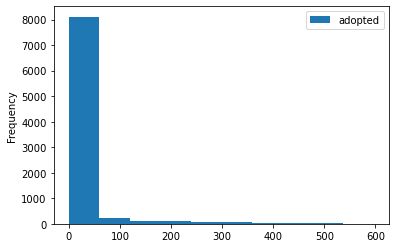

In [19]:
comparison.plot.hist()

In [20]:
comparison.sort_values(by=['adopted'], ascending = False)
#Okay this explains how 'True' was the most common value - those who are active are very active and that counts for
#more than a single 'False'

,adopted
user_id,
3623,596
906,591
1811,586
7590,578
8068,575
...,...
4459,0
4457,0
4456,0


In [21]:
users.rename(columns={'object_id': 'user_id'}, inplace=True)
users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [22]:
adopted_users = users.merge(comparison, on=['user_id'], how='left')
adopted_users['adopted'] = [int(count > 0) for count in adopted_users['adopted']]
adopted_users['adopted'].unique()

array([0, 1])

In [23]:
adopted_users['creation_source'].unique() # okay so this should be one-hot encoded

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [24]:
#last_session_creation_time and invited_by_user_id have null values - I think I should retain a count of the number of
#invited users per user_id and then also retain whether or not someone was invited, then drop name and email and
#convert creation time into a numeric of days.
adopted_users['invited_by_user_id'].value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [25]:
invite_counts = pd.DataFrame(adopted_users['invited_by_user_id'].value_counts())
invite_counts['user_id'] = invite_counts.index
invite_counts['user_id'] = invite_counts['user_id'].astype(int)
invite_counts

,invited_by_user_id,user_id
10741.0,13,10741
2527.0,12,2527
2308.0,11,2308
1525.0,11,1525
11770.0,11,11770
...,...,...
2746.0,1,2746
10456.0,1,10456
8371.0,1,8371
6266.0,1,6266


In [26]:
invite_counts.rename(columns={'invited_by_user_id': 'count_of_users_invited'}, inplace= True)
adopted_users = adopted_users.merge(invite_counts, on=['user_id'], how='left')
adopted_users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,NaN
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,1.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,7.0


In [27]:
adopted_users['count_of_users_invited'].fillna(0, inplace=True)
adopted_users['count_of_users_invited'] = adopted_users['count_of_users_invited'].astype(int)
adopted_users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,7


In [28]:
adopted_users['invited_by_user_id'].fillna(0, inplace = True)
adopted_users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0,7


In [29]:
adopted_users['invited_by_user_id'] = [int(user > 0) for user in adopted_users['invited_by_user_id']]
adopted_users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,1,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,1,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,0,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,1,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0,0,7


In [30]:
today = pd.to_datetime(day_logs['day_stamp'].max())
today

Timestamp('2014-06-06 00:00:00')

In [31]:
adopted_users['creation_time'] = [pd.to_datetime(creation) for creation in adopted_users['creation_time'] ]
adopted_users['creation_time'].max()

Timestamp('2014-05-30 23:59:19')

In [32]:
adopted_users['days_since_creation'] = [int((today - creation).days) for creation in adopted_users['creation_time']]
adopted_users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited,days_since_creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1,0,0,44
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,1,0,202
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1,0,1,443
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1,0,0,380
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1,0,0,504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,1,0,0,272
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,0,1,511
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,1,0,0,39
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0,0,7,735


In [33]:
adopted_users['org_id'].unique() #This is a problem because I know these aren't linearly related so I need to one-hot
#encode or do something with them. I also have no information on what these org ids correspond to.

array([ 11,   1,  94, 193, 197,  37,  74, 302, 318,  69, 130, 254,   0,
       175, 211,   2,  58,  54,   7,   6, 123,  81,  56, 134,  92, 251,
       283,  98, 401,  33,  59, 109, 276, 208, 332,  64, 235,  63,  14,
         4, 127,  32, 224, 304,  61,  51, 229,  88, 325, 150, 347, 203,
        21, 409, 215, 141,   5, 107, 184, 310, 367, 389,  89, 242,  68,
        16,  49, 185,  91, 172,   8,  43, 249,  26, 139,  70,  10, 252,
        53, 119,   3, 196, 335, 375, 303, 307,  25, 370,  83,  27, 306,
       118, 295,  19, 301, 100, 112, 263,  39,  12,  86, 402,  42, 103,
       373, 268,  30, 406,  48, 313,   9, 138, 261,  35, 264,  95,  55,
        60, 234,  28, 410, 170, 374,  15,  17, 364,  62, 244, 342, 225,
       121, 255, 411, 217, 165, 415, 104, 329, 278, 116, 151, 290, 200,
       187, 122, 353, 135, 328,  36,  13, 341, 349, 198, 153, 108,  77,
       142, 275, 176,  87, 191, 102, 245, 154, 218, 385,  76, 321, 159,
       371,  50,  75, 333, 137, 292, 286, 131, 178, 213, 376, 36

In [34]:
adopted_users.set_index('user_id', inplace=True)

In [35]:
adopted_users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited,days_since_creation
user_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1,0,0,44
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,1,0,202
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1,0,1,443
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1,0,0,380
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1,0,0,504
...,...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,1,0,0,272
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,0,1,511
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,1,0,0,39


In [36]:
#Might be interesting to extract the type of email address from email rather than delete this category - could be
#useful to know. Also with unlimited time I might try to play with the names to extract a guess for gender but that's
#beyond me at the moment.
adopted_users['email'] = [str(email.split('@')[1]) for email in adopted_users['email']]
adopted_users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited,days_since_creation
user_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1,0,0,44
2,2013-11-15 03:45:04,Poole Matthew,gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,1,0,202
3,2013-03-19 23:14:52,Bottrill Mitchell,gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1,0,1,443
4,2013-05-21 08:09:28,Clausen Nicklas,yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1,0,0,380
5,2013-01-17 10:14:20,Raw Grace,yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1,0,0,504
...,...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,gustr.com,ORG_INVITE,1.378448e+09,0,0,89,1,0,0,272
11997,2013-01-10 18:28:37,Fisher Amelie,gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,0,1,511
11998,2014-04-27 12:45:16,Haynes Jake,cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,1,0,0,39


In [37]:
adopted_users['email'].unique()

array(['yahoo.com', 'gustr.com', 'jourrapide.com', ..., 'uyhoy.com',
       'eaouk.com', 'iuxiw.com'], dtype=object)

In [38]:
null_data = adopted_users[adopted_users.isnull().any(axis=1)]
null_data

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited,days_since_creation
user_id,,,,,,,,,,,,
8,2013-07-31 05:34:02,Hamilton Danielle,yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0,0,0,309
9,2013-11-05 04:04:24,Amsel Paul,hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0,0,0,212
12,2014-04-17 23:48:38,Mathiesen Lærke,cuvox.de,ORG_INVITE,NaN,0,0,130,1,0,0,49
15,2013-07-16 21:33:54,Theiss Ralf,hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,0,0,0,324
16,2013-02-11 10:09:50,Engel René,hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,0,0,0,479
...,...,...,...,...,...,...,...,...,...,...,...,...
11976,2013-12-25 22:01:41,Kohl Leah,hotmail.com,PERSONAL_PROJECTS,NaN,0,0,248,0,0,0,162
11978,2014-04-23 16:28:06,Castro Pedro,gustr.com,PERSONAL_PROJECTS,NaN,1,0,29,0,0,1,43
11985,2013-07-08 17:23:26,Jespersen Marcus,cuvox.de,PERSONAL_PROJECTS,NaN,0,0,74,0,0,0,332


In [39]:
null_data.index

Int64Index([    8,     9,    12,    15,    16,    18,    26,    32,    34,
               35,
            ...
            11966, 11970, 11971, 11972, 11973, 11976, 11978, 11985, 11993,
            11994],
           dtype='int64', name='user_id', length=3177)

In [45]:
#merged[merged['user_id'].isin(null_data.index)]
merged['user_id'] = merged['user_id'].astype(int)

In [50]:
merged.head(50) #Okay so I seem to have found why certain users have NaN in their 'last_session_creation_time' -
#seems like those user_ids either no longer exist or never created a session. Just going to double-check I didn't
#accidentally delete them.

,user_id,day_stamp,pos_active,deltas,adopted
0,1,2014-04-22,False,-1 days,0
1,2,2013-11-15,True,-1 days,0
2,2,2013-11-29,True,-144 days,0
3,2,2013-12-09,True,24 days,0
4,2,2013-12-25,True,26 days,0
5,2,2013-12-31,True,22 days,0
6,2,2014-01-08,True,14 days,0
7,2,2014-02-03,True,34 days,0
8,2,2014-02-08,True,31 days,0
9,2,2014-02-09,True,6 days,1


In [53]:
recheck_log = pd.read_csv('takehome_user_engagement.csv')
recheck_log[recheck_log['user_id'].isin(null_data.index)]

,time_stamp,user_id,visited


In [54]:
recheck_log.head(50) #Right, so those ids must have been created at a certain point because they're in the other
#dataset but they don't have any logged sessions. Filling their last session creation time with zero
#would seem to indicate that they JUST had a last session though, so I'm not sure how best to fill that.

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [64]:
#Essentially, I'm not sure how to handle this but it sounds more useful to me to know that someone never created
#a session than to know to the second how long ago their last session was. I have transformed the account creation
#dates into a days-ago int. Maybe I should just create a count of their active sessions and use that to replace this
#category.
sessions = pd.DataFrame(merged['user_id'].value_counts())
sessions.rename(columns={'user_id': 'num_sessions'}, inplace=True)

In [67]:
sessions.sort_index(inplace=True)

In [68]:
sessions['user_id'] = sessions.index
sessions

,num_sessions,user_id
1,1,1
2,14,2
3,1,3
4,1,4
5,1,5
...,...,...
11996,1,11996
11997,1,11997
11998,1,11998
11999,1,11999


In [73]:
adopted = adopted_users.merge(sessions, on=['user_id'], how='left')
adopted.info() #This further confirms what's already known - the last_session_creation_time and num_sessions columns
#have the same amount of null values. Now I can fill them with zeros in num_sessions without a problem and I think I'll
#just drop the last_session column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
 10  adopted                     12000 non-null  int64         
 11  count_of_users_invited      12000 non-null  int64     

In [76]:
adopted['num_sessions'].fillna(0, inplace=True)
adopted['num_sessions'] = adopted['num_sessions'].astype(int)
adopted

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited,days_since_creation,num_sessions
0,1,2014-04-22 03:53:30,Clausen August,yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1,0,0,44,1
1,2,2013-11-15 03:45:04,Poole Matthew,gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1,1,0,202,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1,0,1,443,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1,0,0,380,1
4,5,2013-01-17 10:14:20,Raw Grace,yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1,0,0,504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,gustr.com,ORG_INVITE,1.378448e+09,0,0,89,1,0,0,272,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,0,1,511,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,1,0,0,39,1
11998,11999,2012-05-31 11:55:59,Faber Annett,iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0,0,7,735,1


In [77]:
adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int64         
 10  adopted                     12000 non-null  int64         
 11  count_of_users_invited      12000 non-null  int64     

In [80]:
adopted.set_index('user_id', inplace=True)

In [83]:
adopted.drop(labels=['creation_time', 'name', 'last_session_creation_time'], axis=1, inplace=True)
adopted

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,count_of_users_invited,days_since_creation,num_sessions
user_id,,,,,,,,,,
1,yahoo.com,GUEST_INVITE,1,0,11,1,0,0,44,1
2,gustr.com,ORG_INVITE,0,0,1,1,1,0,202,14
3,gustr.com,ORG_INVITE,0,0,94,1,0,1,443,1
4,yahoo.com,GUEST_INVITE,0,0,1,1,0,0,380,1
5,yahoo.com,GUEST_INVITE,0,0,193,1,0,0,504,1
...,...,...,...,...,...,...,...,...,...,...
11996,gustr.com,ORG_INVITE,0,0,89,1,0,0,272,1
11997,gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0,0,1,511,1
11998,cuvox.de,GUEST_INVITE,1,1,83,1,0,0,39,1


In [84]:
dummies_adopted = pd.get_dummies(adopted, columns=['email', 'creation_source', 'org_id'])
#Again, I wouldn't ideally do this with 'org_id', but I can't leave it as it is and I feel I don't have enough 
#information to group them into better categories. Ideally, I would group the orgs into categories and then
#encode from those categories
dummies_adopted

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,count_of_users_invited,days_since_creation,num_sessions,email_abdnf.com,email_adpql.com,email_aerbd.com,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,44,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,202,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,443,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,380,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,504,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,0,0,1,0,0,272,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,0,0,0,0,1,511,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11998,1,1,1,0,0,39,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data_columns = dummies_adopted.columns
X = dummies_adopted.drop(['adopted'],axis =1)
X_cols = X.columns
y = dummies_adopted['adopted']
y_col = 'adopted'
#Random Forest Model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score, f1_score, accuracy_score,log_loss, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Test train split is performed on the variables before they've been scaled so that X_test can be transformed after the 
#scaler has been fit for X_train (so that the testing data is not a factor, to prevent leakage) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_estimators':np.arange(1,50)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc,param_grid,cv=5)
rfc_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [90]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.9782291666666667
Best Parameters: {'n_estimators': 37}


Random Forest: Accuracy=0.975
Further Random Forest Metrics:
Balanced accuracy: 0.9328550332233361
Precision score: 0.9574468085106383
Recall score: 0.8725761772853186


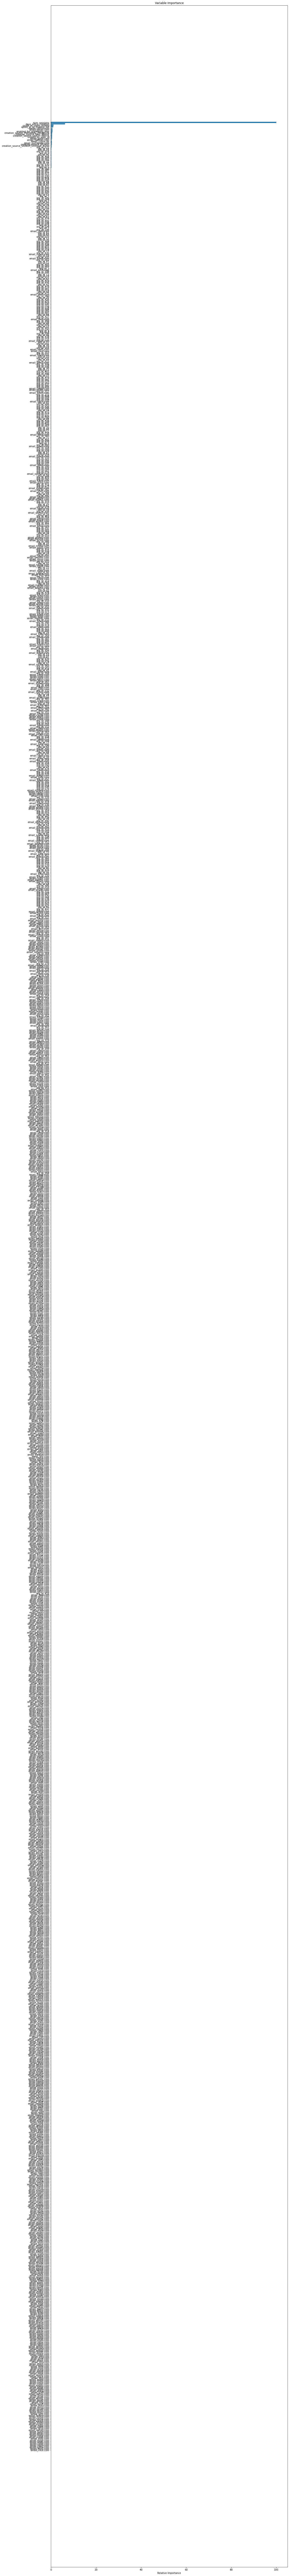

In [118]:
#Wow - that ended up better than I thought it would. I'm using Random Forest only for ease, essentially, because I
#already have code set up to handle it and return variable importance, per this exercise. But it seems to be working
#very well.
from sklearn import tree, metrics
clf = RandomForestClassifier(n_estimators=37)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)

ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
#print('Random Forest: f1-score=%.3f' % (f1)) - same as accuracy score, above
print('Further Random Forest Metrics:')
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score:' , metrics.precision_score(y_test,y_pred))
print('Recall score:' , metrics.recall_score(y_test,y_pred))

#The below is me trying to get the code to return something that's sorted but doesn't try to show the entire 
#list of features because it's way too long to be visually clear. Eventually I just ended up zooming in on the 
#entire thing's visualization.
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .1
#print(pos)
#print(pos.size)
#sorted_idx.size
plt.figure(figsize=(18,200))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Conclusion
### I can see enough in the chart above to be sure 'num_sessions' is extremely important, which makes sense. I do wonder if it was cheating in this exercise to know that, but effectively it makes sense to me that over a period of time you would want to know the amount of times people are logging in. I guess the problem is that that statistic is almost literally the same metric by which user adoption is being measured, so I probably shouldn't have included it. If I were to go back, I would just include whether or not they had ever created a session (a certain number of days after signing up, for instance) and go from there. 
### At any rate, days_since_creation was a distant second in importance, which I think speaks to the importance of framing how long a user has been a user against whether they're creating sessions at all, followed by count_of_users_invited, then opted_into_mailing_list and then email_yahoo.com and email_gmail.com (so I'm glad I decided to hold onto the email types as categories). The types of invite also seem to be grouped near the top too, and whether or not they were invited by another user is also an important factor. 
### From here, I would likely go back and fix 'num_sessions' to something less close to the literal metric being measured (I do think it makes sense to somehow preserve the information that some members have never created sessions) and then chart out histograms of the most important features to see how breaking them down by 'adopted' users charts differently feature-to-feature (i.e. whether it seems to be something that's indicative of likely adoption or, rather, indicative that a user will likely not be adopted). As I mentioned in the notes above, I would also ideally want to approach the org_id category differently, but given a lack of information about those categories I was unable to group them more effectively here. Given more time, I might also attempt to sort the names into best-guess gender categories using NLP and see if that improves model performance.